In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [23]:
df0 = pd.read_csv("965.csv")

In [24]:
df1 = pd.read_csv("E:/AUF Bio Informatics/assignment 1/task 3 video/NNew.csv", )

In [25]:
df1.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,28860,28861,28862,28863,28864,28865,28866,28867,28868,classes
0,MDA-MB-231 cells - No treatment [Sample 1],178.9736,28.6762,31.7815,675.6172,92.4305,1351.3121,135.6727,34.2066,2287.0100,...,1328.3353,222.3161,2342.4773,125.3880,928.8357,1183.5049,555.7216,6590.9146,263.9260,0
1,MDA-MB-231 cells - only 5-ALA [Sample 2],135.9153,26.8458,31.2116,699.5127,108.4411,1063.4213,157.7874,31.1987,2003.9050,...,942.4601,186.9072,1994.8049,130.9669,992.0124,1047.5358,463.6007,6258.7314,242.1986,1
2,MDA-MB-231 cells - FECH siRNA + 5-ALA [Sample 3],116.7858,28.1078,31.6127,830.8206,111.8782,901.3827,148.0238,33.5797,1984.0208,...,790.1002,214.7061,1825.9707,120.9621,1047.0116,1175.9851,433.7868,6572.3823,247.2808,1
3,MDA-MB-231 cells - Allstar siRNA + 5-ALA [Samp...,102.1330,27.6851,33.0668,825.4612,113.8566,1264.8517,212.0051,35.0494,2556.0955,...,724.8879,198.1736,1404.1472,109.7926,1133.8896,1023.9245,523.5878,5778.8857,293.1355,1
4,MDA-MB-231 cells - No treatment [Sample 5],141.7910,28.4614,31.6599,710.0635,99.2342,994.2628,152.5329,31.0850,2169.0264,...,1167.7706,200.0804,1972.8993,122.7974,1014.4892,1223.3410,547.3867,7200.7124,250.2201,0


In [15]:
#df1 = df1[1:] #drop first row

# Some preprocessing

In [26]:
X = df1.T
X = X[1:] 

In [27]:
y = df1.T
y = y.tail(1)
y

,0,1,2,3,4,5,6,7,8,9,10,11
classes,0,1,1,1,0,1,1,1,0,1,1,1


In [28]:
import pandas as pd
from sklearn import preprocessing

In [29]:
x = X #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

E:\New folder\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [30]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.007716,0.005707,0.004984,0.004321,0.006053,0.006965,0.005929,0.006334,0.006080,0.007104,0.007265,0.006610
1,0.001236,0.001093,0.001167,0.001140,0.001215,0.001168,0.001177,0.001144,0.001257,0.001111,0.001112,0.001173
2,0.001370,0.001278,0.001318,0.001370,0.001351,0.001369,0.001279,0.001277,0.001397,0.001306,0.001374,0.001467
3,0.029129,0.029548,0.035723,0.035224,0.030311,0.030496,0.031444,0.037797,0.035220,0.019051,0.033118,0.033377
4,0.003985,0.004545,0.004773,0.004822,0.004236,0.003526,0.003546,0.005068,0.004983,0.003131,0.004888,0.005314


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205C3335B38>,
      dtype=object)

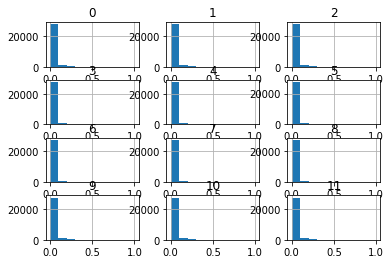

In [31]:
X.hist()

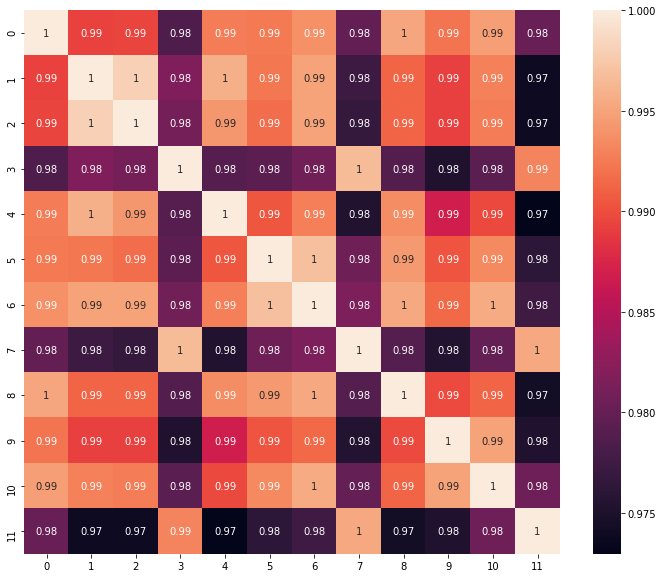

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), annot=True)
plt.show()

# Feature selection

In [12]:
#PCA

In [33]:
def split_data(X,y, ratio):
    from sklearn.model_selection import train_test_split
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=ratio, random_state=34)
    return train_X, test_X, train_y, test_y

In [34]:
train_X, test_X, train_y, test_y = split_data(X.T,y.T ,0.3)

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA()
pca.fit(train_X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [37]:
pca.explained_variance_ratio_

array([5.25915976e-01, 1.83400882e-01, 1.57993174e-01, 5.20461489e-02,
       3.94871690e-02, 2.58232314e-02, 1.53334186e-02, 5.04822472e-31])

Text(0, 0.5, 'explained_variance_ratio_')

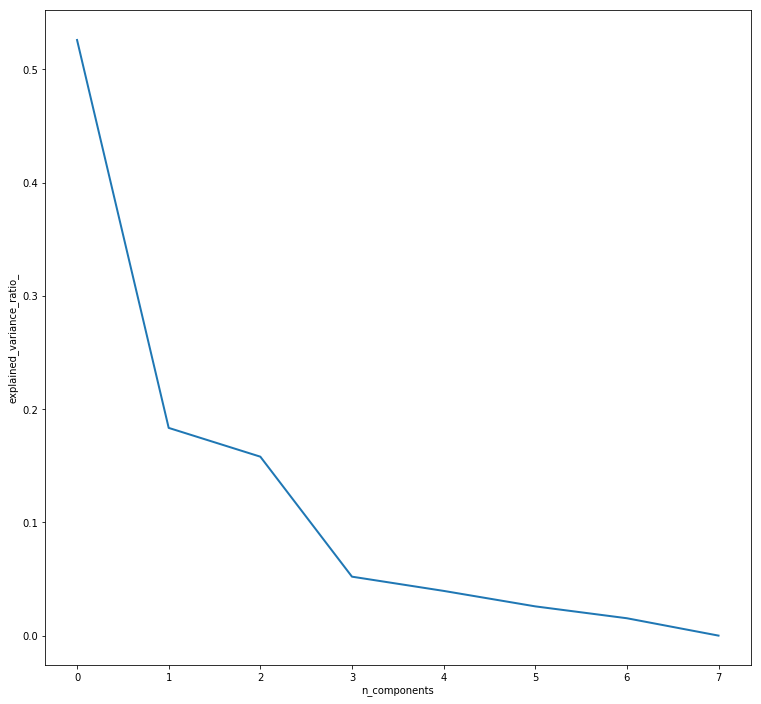

In [38]:
plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

# Visualize 2D Projection PCA

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_X)
print("original shape:   ", train_X.shape)
print("transformed shape:",principalComponents.shape)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])



finalDf = principalDf
finalDf['target'] =y.T



original shape:    (8, 28870)
transformed shape: (8, 2)


Text(0, 0.5, 'component 2')

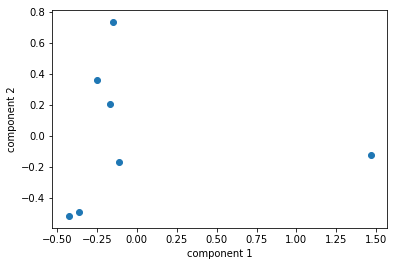

In [20]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1])

plt.xlabel('component 1')
plt.ylabel('component 2')


# LDA

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(train_X, train_y.astype(int))
X_lda.transform(train_X)
X_lda.transform(test_X)
lda.explained_variance_ratio_

E:\New folder\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\New folder\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([1.])

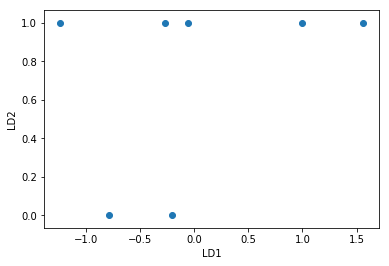

In [22]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda.transform(train_X),
    y=train_y.astype(int)

)

# CHI2

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(train_X, train_y.astype(int))

print('Score list:', select_feature.scores_)


Score list: [4.54167606e-06 4.87068977e-06 5.78750882e-07 ... 4.02295274e-03
 1.94888547e-04            nan]


# Tree based feature selection and random forest classification

In [42]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()      
clf.fit(train_X, train_y.astype(int))
importances = clf.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

# plt.figure(1, figsize=(14, 13))
# plt.title("Feature importances")
# plt.bar(range(train_X.shape[1]), importances[indices],
#        color="g", yerr=std[indices], align="center")
# plt.xticks(range(train_X.shape[1]), train_X.columns[indices],rotation=90)
# plt.xlim([-1, train_X.shape[1]])
# plt.show()

E:\New folder\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\New folder\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0. 0. 0. ... 0. 0. 0.]
Feature ranking:
1. feature 5116 (0.100000)
2. feature 24232 (0.100000)
3. feature 17975 (0.100000)
4. feature 8500 (0.100000)
5. feature 25091 (0.100000)
6. feature 24974 (0.100000)
7. feature 9617 (0.000000)
8. feature 9618 (0.000000)
9. feature 9619 (0.000000)
10. feature 9620 (0.000000)
11. feature 9627 (0.000000)
12. feature 9622 (0.000000)
13. feature 9623 (0.000000)
14. feature 9624 (0.000000)
15. feature 9625 (0.000000)
16. feature 9626 (0.000000)
17. feature 9621 (0.000000)
18. feature 28869 (0.000000)
19. feature 9628 (0.000000)
20. feature 9615 (0.000000)
21. feature 9629 (0.000000)
22. feature 9630 (0.000000)
23. feature 9631 (0.000000)
24. feature 9632 (0.000000)
25. feature 9633 (0.000000)
26. feature 9634 (0.000000)
27. feature 9635 (0.000000)
28. feature 9636 (0.000000)
29. feature 9616 (0.000000)
30. feature 9614 (0.000000)
31. feature 9638 (0.000000)
32. feature 9613 (0.000000)
33. feature 9588 (0.000000)
34. feature 9589 (0.000000)
35. feature

1691. feature 10340 (0.000000)
1692. feature 10341 (0.000000)
1693. feature 10260 (0.000000)
1694. feature 10259 (0.000000)
1695. feature 10258 (0.000000)
1696. feature 10188 (0.000000)
1697. feature 10177 (0.000000)
1698. feature 10178 (0.000000)
1699. feature 10179 (0.000000)
1700. feature 10180 (0.000000)
1701. feature 10181 (0.000000)
1702. feature 10182 (0.000000)
1703. feature 10183 (0.000000)
1704. feature 10184 (0.000000)
1705. feature 10185 (0.000000)
1706. feature 10186 (0.000000)
1707. feature 10187 (0.000000)
1708. feature 10189 (0.000000)
1709. feature 10175 (0.000000)
1710. feature 10190 (0.000000)
1711. feature 10191 (0.000000)
1712. feature 10192 (0.000000)
1713. feature 10193 (0.000000)
1714. feature 10194 (0.000000)
1715. feature 10195 (0.000000)
1716. feature 10196 (0.000000)
1717. feature 10197 (0.000000)
1718. feature 10198 (0.000000)
1719. feature 10199 (0.000000)
1720. feature 10200 (0.000000)
1721. feature 10176 (0.000000)
1722. feature 10174 (0.000000)
1723. fe

3190. feature 8260 (0.000000)
3191. feature 8246 (0.000000)
3192. feature 8235 (0.000000)
3193. feature 8236 (0.000000)
3194. feature 8237 (0.000000)
3195. feature 8238 (0.000000)
3196. feature 8239 (0.000000)
3197. feature 8240 (0.000000)
3198. feature 8241 (0.000000)
3199. feature 8242 (0.000000)
3200. feature 8243 (0.000000)
3201. feature 8244 (0.000000)
3202. feature 8245 (0.000000)
3203. feature 8247 (0.000000)
3204. feature 8259 (0.000000)
3205. feature 8248 (0.000000)
3206. feature 8249 (0.000000)
3207. feature 8250 (0.000000)
3208. feature 8251 (0.000000)
3209. feature 8252 (0.000000)
3210. feature 8253 (0.000000)
3211. feature 8254 (0.000000)
3212. feature 8255 (0.000000)
3213. feature 8256 (0.000000)
3214. feature 8257 (0.000000)
3215. feature 8258 (0.000000)
3216. feature 8288 (0.000000)
3217. feature 8289 (0.000000)
3218. feature 8290 (0.000000)
3219. feature 8331 (0.000000)
3220. feature 8320 (0.000000)
3221. feature 8321 (0.000000)
3222. feature 8322 (0.000000)
3223. feat

4690. feature 14072 (0.000000)
4691. feature 14073 (0.000000)
4692. feature 14074 (0.000000)
4693. feature 14075 (0.000000)
4694. feature 14076 (0.000000)
4695. feature 14077 (0.000000)
4696. feature 14078 (0.000000)
4697. feature 14079 (0.000000)
4698. feature 14081 (0.000000)
4699. feature 14067 (0.000000)
4700. feature 14082 (0.000000)
4701. feature 14083 (0.000000)
4702. feature 14084 (0.000000)
4703. feature 14085 (0.000000)
4704. feature 14086 (0.000000)
4705. feature 14087 (0.000000)
4706. feature 14088 (0.000000)
4707. feature 14089 (0.000000)
4708. feature 14090 (0.000000)
4709. feature 14091 (0.000000)
4710. feature 14092 (0.000000)
4711. feature 14068 (0.000000)
4712. feature 14066 (0.000000)
4713. feature 14040 (0.000000)
4714. feature 14052 (0.000000)
4715. feature 14041 (0.000000)
4716. feature 14042 (0.000000)
4717. feature 14043 (0.000000)
4718. feature 14044 (0.000000)
4719. feature 14045 (0.000000)
4720. feature 14046 (0.000000)
4721. feature 14047 (0.000000)
4722. fe

6189. feature 11227 (0.000000)
6190. feature 11228 (0.000000)
6191. feature 11229 (0.000000)
6192. feature 11230 (0.000000)
6193. feature 11232 (0.000000)
6194. feature 11244 (0.000000)
6195. feature 11233 (0.000000)
6196. feature 11234 (0.000000)
6197. feature 11235 (0.000000)
6198. feature 11236 (0.000000)
6199. feature 11237 (0.000000)
6200. feature 11238 (0.000000)
6201. feature 11239 (0.000000)
6202. feature 11240 (0.000000)
6203. feature 11241 (0.000000)
6204. feature 11242 (0.000000)
6205. feature 11243 (0.000000)
6206. feature 11162 (0.000000)
6207. feature 11161 (0.000000)
6208. feature 11160 (0.000000)
6209. feature 11090 (0.000000)
6210. feature 11079 (0.000000)
6211. feature 11080 (0.000000)
6212. feature 11081 (0.000000)
6213. feature 11082 (0.000000)
6214. feature 11083 (0.000000)
6215. feature 11084 (0.000000)
6216. feature 11085 (0.000000)
6217. feature 11086 (0.000000)
6218. feature 11087 (0.000000)
6219. feature 11088 (0.000000)
6220. feature 11089 (0.000000)
6221. fe

7689. feature 1959 (0.000000)
7690. feature 1960 (0.000000)
7691. feature 1961 (0.000000)
7692. feature 1962 (0.000000)
7693. feature 1963 (0.000000)
7694. feature 1964 (0.000000)
7695. feature 1965 (0.000000)
7696. feature 1966 (0.000000)
7697. feature 1967 (0.000000)
7698. feature 1968 (0.000000)
7699. feature 1969 (0.000000)
7700. feature 1970 (0.000000)
7701. feature 1945 (0.000000)
7702. feature 1944 (0.000000)
7703. feature 1943 (0.000000)
7704. feature 1929 (0.000000)
7705. feature 1918 (0.000000)
7706. feature 1919 (0.000000)
7707. feature 1920 (0.000000)
7708. feature 1921 (0.000000)
7709. feature 1922 (0.000000)
7710. feature 1923 (0.000000)
7711. feature 1924 (0.000000)
7712. feature 1925 (0.000000)
7713. feature 1926 (0.000000)
7714. feature 1927 (0.000000)
7715. feature 1928 (0.000000)
7716. feature 1930 (0.000000)
7717. feature 1942 (0.000000)
7718. feature 1931 (0.000000)
7719. feature 1932 (0.000000)
7720. feature 1933 (0.000000)
7721. feature 1934 (0.000000)
7722. feat

9188. feature 469 (0.000000)
9189. feature 470 (0.000000)
9190. feature 471 (0.000000)
9191. feature 472 (0.000000)
9192. feature 473 (0.000000)
9193. feature 474 (0.000000)
9194. feature 475 (0.000000)
9195. feature 505 (0.000000)
9196. feature 506 (0.000000)
9197. feature 507 (0.000000)
9198. feature 548 (0.000000)
9199. feature 537 (0.000000)
9200. feature 538 (0.000000)
9201. feature 539 (0.000000)
9202. feature 540 (0.000000)
9203. feature 541 (0.000000)
9204. feature 542 (0.000000)
9205. feature 543 (0.000000)
9206. feature 544 (0.000000)
9207. feature 545 (0.000000)
9208. feature 546 (0.000000)
9209. feature 547 (0.000000)
9210. feature 549 (0.000000)
9211. feature 535 (0.000000)
9212. feature 550 (0.000000)
9213. feature 551 (0.000000)
9214. feature 552 (0.000000)
9215. feature 553 (0.000000)
9216. feature 554 (0.000000)
9217. feature 555 (0.000000)
9218. feature 556 (0.000000)
9219. feature 557 (0.000000)
9220. feature 558 (0.000000)
9221. feature 559 (0.000000)
9222. feature 

10688. feature 1349 (0.000000)
10689. feature 1325 (0.000000)
10690. feature 1323 (0.000000)
10691. feature 1297 (0.000000)
10692. feature 1309 (0.000000)
10693. feature 1298 (0.000000)
10694. feature 1299 (0.000000)
10695. feature 1300 (0.000000)
10696. feature 1301 (0.000000)
10697. feature 1302 (0.000000)
10698. feature 1303 (0.000000)
10699. feature 1304 (0.000000)
10700. feature 1305 (0.000000)
10701. feature 1306 (0.000000)
10702. feature 1307 (0.000000)
10703. feature 1308 (0.000000)
10704. feature 1310 (0.000000)
10705. feature 1322 (0.000000)
10706. feature 1311 (0.000000)
10707. feature 1312 (0.000000)
10708. feature 1313 (0.000000)
10709. feature 1314 (0.000000)
10710. feature 1315 (0.000000)
10711. feature 1316 (0.000000)
10712. feature 1317 (0.000000)
10713. feature 1318 (0.000000)
10714. feature 1319 (0.000000)
10715. feature 1320 (0.000000)
10716. feature 1321 (0.000000)
10717. feature 1240 (0.000000)
10718. feature 1239 (0.000000)
10719. feature 1238 (0.000000)
10720. f

12187. feature 6459 (0.000000)
12188. feature 6460 (0.000000)
12189. feature 6461 (0.000000)
12190. feature 6462 (0.000000)
12191. feature 6463 (0.000000)
12192. feature 6464 (0.000000)
12193. feature 6465 (0.000000)
12194. feature 6466 (0.000000)
12195. feature 6467 (0.000000)
12196. feature 6468 (0.000000)
12197. feature 6469 (0.000000)
12198. feature 6470 (0.000000)
12199. feature 6471 (0.000000)
12200. feature 6472 (0.000000)
12201. feature 6473 (0.000000)
12202. feature 6474 (0.000000)
12203. feature 6475 (0.000000)
12204. feature 6476 (0.000000)
12205. feature 6477 (0.000000)
12206. feature 6478 (0.000000)
12207. feature 6479 (0.000000)
12208. feature 6480 (0.000000)
12209. feature 6481 (0.000000)
12210. feature 6482 (0.000000)
12211. feature 6457 (0.000000)
12212. feature 6456 (0.000000)
12213. feature 6455 (0.000000)
12214. feature 6441 (0.000000)
12215. feature 6430 (0.000000)
12216. feature 6431 (0.000000)
12217. feature 6432 (0.000000)
12218. feature 6433 (0.000000)
12219. f

13687. feature 4969 (0.000000)
13688. feature 4970 (0.000000)
13689. feature 4971 (0.000000)
13690. feature 4972 (0.000000)
13691. feature 4973 (0.000000)
13692. feature 4975 (0.000000)
13693. feature 4987 (0.000000)
13694. feature 4976 (0.000000)
13695. feature 4977 (0.000000)
13696. feature 4978 (0.000000)
13697. feature 4979 (0.000000)
13698. feature 4980 (0.000000)
13699. feature 4981 (0.000000)
13700. feature 4982 (0.000000)
13701. feature 4983 (0.000000)
13702. feature 4984 (0.000000)
13703. feature 4985 (0.000000)
13704. feature 4986 (0.000000)
13705. feature 5016 (0.000000)
13706. feature 5017 (0.000000)
13707. feature 5018 (0.000000)
13708. feature 5059 (0.000000)
13709. feature 5048 (0.000000)
13710. feature 5049 (0.000000)
13711. feature 5050 (0.000000)
13712. feature 5051 (0.000000)
13713. feature 5052 (0.000000)
13714. feature 5053 (0.000000)
13715. feature 5054 (0.000000)
13716. feature 5055 (0.000000)
13717. feature 5056 (0.000000)
13718. feature 5057 (0.000000)
13719. f

15186. feature 23889 (0.000000)
15187. feature 23891 (0.000000)
15188. feature 23877 (0.000000)
15189. feature 23892 (0.000000)
15190. feature 23893 (0.000000)
15191. feature 23894 (0.000000)
15192. feature 23895 (0.000000)
15193. feature 23896 (0.000000)
15194. feature 23897 (0.000000)
15195. feature 23898 (0.000000)
15196. feature 23899 (0.000000)
15197. feature 23900 (0.000000)
15198. feature 23901 (0.000000)
15199. feature 23902 (0.000000)
15200. feature 23878 (0.000000)
15201. feature 23876 (0.000000)
15202. feature 23850 (0.000000)
15203. feature 23862 (0.000000)
15204. feature 23851 (0.000000)
15205. feature 23852 (0.000000)
15206. feature 23853 (0.000000)
15207. feature 23854 (0.000000)
15208. feature 23855 (0.000000)
15209. feature 23856 (0.000000)
15210. feature 23857 (0.000000)
15211. feature 23858 (0.000000)
15212. feature 23859 (0.000000)
15213. feature 23860 (0.000000)
15214. feature 23861 (0.000000)
15215. feature 23863 (0.000000)
15216. feature 23875 (0.000000)
15217. f

16686. feature 22402 (0.000000)
16687. feature 22403 (0.000000)
16688. feature 22404 (0.000000)
16689. feature 22405 (0.000000)
16690. feature 22406 (0.000000)
16691. feature 22407 (0.000000)
16692. feature 22408 (0.000000)
16693. feature 22102 (0.000000)
16694. feature 22100 (0.000000)
16695. feature 22551 (0.000000)
16696. feature 21763 (0.000000)
16697. feature 21793 (0.000000)
16698. feature 21794 (0.000000)
16699. feature 21795 (0.000000)
16700. feature 21796 (0.000000)
16701. feature 21797 (0.000000)
16702. feature 21798 (0.000000)
16703. feature 21799 (0.000000)
16704. feature 21800 (0.000000)
16705. feature 21801 (0.000000)
16706. feature 21802 (0.000000)
16707. feature 21803 (0.000000)
16708. feature 21804 (0.000000)
16709. feature 21805 (0.000000)
16710. feature 21806 (0.000000)
16711. feature 21807 (0.000000)
16712. feature 21808 (0.000000)
16713. feature 21809 (0.000000)
16714. feature 21810 (0.000000)
16715. feature 21811 (0.000000)
16716. feature 21812 (0.000000)
16717. f

18185. feature 27569 (0.000000)
18186. feature 27570 (0.000000)
18187. feature 27571 (0.000000)
18188. feature 27546 (0.000000)
18189. feature 27545 (0.000000)
18190. feature 27544 (0.000000)
18191. feature 27530 (0.000000)
18192. feature 27519 (0.000000)
18193. feature 27520 (0.000000)
18194. feature 27521 (0.000000)
18195. feature 27522 (0.000000)
18196. feature 27523 (0.000000)
18197. feature 27524 (0.000000)
18198. feature 27525 (0.000000)
18199. feature 27526 (0.000000)
18200. feature 27527 (0.000000)
18201. feature 27528 (0.000000)
18202. feature 27529 (0.000000)
18203. feature 27531 (0.000000)
18204. feature 27543 (0.000000)
18205. feature 27532 (0.000000)
18206. feature 27533 (0.000000)
18207. feature 27534 (0.000000)
18208. feature 27535 (0.000000)
18209. feature 27536 (0.000000)
18210. feature 27537 (0.000000)
18211. feature 27538 (0.000000)
18212. feature 27539 (0.000000)
18213. feature 27540 (0.000000)
18214. feature 27541 (0.000000)
18215. feature 27542 (0.000000)
18216. f

19685. feature 28404 (0.000000)
19686. feature 28393 (0.000000)
19687. feature 28394 (0.000000)
19688. feature 28395 (0.000000)
19689. feature 28396 (0.000000)
19690. feature 28397 (0.000000)
19691. feature 28398 (0.000000)
19692. feature 28399 (0.000000)
19693. feature 28400 (0.000000)
19694. feature 28401 (0.000000)
19695. feature 28402 (0.000000)
19696. feature 28403 (0.000000)
19697. feature 28405 (0.000000)
19698. feature 28391 (0.000000)
19699. feature 28406 (0.000000)
19700. feature 28407 (0.000000)
19701. feature 28408 (0.000000)
19702. feature 28409 (0.000000)
19703. feature 28410 (0.000000)
19704. feature 28411 (0.000000)
19705. feature 28412 (0.000000)
19706. feature 28413 (0.000000)
19707. feature 28414 (0.000000)
19708. feature 28415 (0.000000)
19709. feature 28416 (0.000000)
19710. feature 28392 (0.000000)
19711. feature 28390 (0.000000)
19712. feature 28364 (0.000000)
19713. feature 28376 (0.000000)
19714. feature 28365 (0.000000)
19715. feature 28366 (0.000000)
19716. f

21184. feature 26904 (0.000000)
21185. feature 26905 (0.000000)
21186. feature 26906 (0.000000)
21187. feature 26907 (0.000000)
21188. feature 26908 (0.000000)
21189. feature 26909 (0.000000)
21190. feature 26911 (0.000000)
21191. feature 26923 (0.000000)
21192. feature 26912 (0.000000)
21193. feature 26913 (0.000000)
21194. feature 26914 (0.000000)
21195. feature 26915 (0.000000)
21196. feature 26916 (0.000000)
21197. feature 26917 (0.000000)
21198. feature 26918 (0.000000)
21199. feature 26919 (0.000000)
21200. feature 26920 (0.000000)
21201. feature 26921 (0.000000)
21202. feature 26922 (0.000000)
21203. feature 26616 (0.000000)
21204. feature 26614 (0.000000)
21205. feature 26165 (0.000000)
21206. feature 26277 (0.000000)
21207. feature 26307 (0.000000)
21208. feature 26308 (0.000000)
21209. feature 26309 (0.000000)
21210. feature 26310 (0.000000)
21211. feature 26311 (0.000000)
21212. feature 26312 (0.000000)
21213. feature 26313 (0.000000)
21214. feature 26314 (0.000000)
21215. f

22684. feature 17631 (0.000000)
22685. feature 17632 (0.000000)
22686. feature 17633 (0.000000)
22687. feature 17634 (0.000000)
22688. feature 17635 (0.000000)
22689. feature 17636 (0.000000)
22690. feature 17637 (0.000000)
22691. feature 17638 (0.000000)
22692. feature 17639 (0.000000)
22693. feature 17640 (0.000000)
22694. feature 17641 (0.000000)
22695. feature 17642 (0.000000)
22696. feature 17643 (0.000000)
22697. feature 17644 (0.000000)
22698. feature 17619 (0.000000)
22699. feature 17618 (0.000000)
22700. feature 17617 (0.000000)
22701. feature 17603 (0.000000)
22702. feature 17592 (0.000000)
22703. feature 17593 (0.000000)
22704. feature 17594 (0.000000)
22705. feature 17595 (0.000000)
22706. feature 17596 (0.000000)
22707. feature 17597 (0.000000)
22708. feature 17598 (0.000000)
22709. feature 17599 (0.000000)
22710. feature 17600 (0.000000)
22711. feature 17601 (0.000000)
22712. feature 17602 (0.000000)
22713. feature 17604 (0.000000)
22714. feature 17616 (0.000000)
22715. f

24183. feature 14788 (0.000000)
24184. feature 14789 (0.000000)
24185. feature 14790 (0.000000)
24186. feature 14791 (0.000000)
24187. feature 14792 (0.000000)
24188. feature 14793 (0.000000)
24189. feature 14794 (0.000000)
24190. feature 14795 (0.000000)
24191. feature 14796 (0.000000)
24192. feature 14826 (0.000000)
24193. feature 14827 (0.000000)
24194. feature 14828 (0.000000)
24195. feature 14869 (0.000000)
24196. feature 14858 (0.000000)
24197. feature 14859 (0.000000)
24198. feature 14860 (0.000000)
24199. feature 14861 (0.000000)
24200. feature 14862 (0.000000)
24201. feature 14863 (0.000000)
24202. feature 14864 (0.000000)
24203. feature 14865 (0.000000)
24204. feature 14866 (0.000000)
24205. feature 14867 (0.000000)
24206. feature 14868 (0.000000)
24207. feature 14870 (0.000000)
24208. feature 14856 (0.000000)
24209. feature 14871 (0.000000)
24210. feature 14872 (0.000000)
24211. feature 14873 (0.000000)
24212. feature 14874 (0.000000)
24213. feature 14875 (0.000000)
24214. f

25683. feature 20631 (0.000000)
25684. feature 20632 (0.000000)
25685. feature 20608 (0.000000)
25686. feature 20606 (0.000000)
25687. feature 20580 (0.000000)
25688. feature 20592 (0.000000)
25689. feature 20581 (0.000000)
25690. feature 20582 (0.000000)
25691. feature 20583 (0.000000)
25692. feature 20584 (0.000000)
25693. feature 20585 (0.000000)
25694. feature 20586 (0.000000)
25695. feature 20587 (0.000000)
25696. feature 20588 (0.000000)
25697. feature 20589 (0.000000)
25698. feature 20590 (0.000000)
25699. feature 20591 (0.000000)
25700. feature 20593 (0.000000)
25701. feature 20605 (0.000000)
25702. feature 20594 (0.000000)
25703. feature 20595 (0.000000)
25704. feature 20596 (0.000000)
25705. feature 20597 (0.000000)
25706. feature 20598 (0.000000)
25707. feature 20599 (0.000000)
25708. feature 20600 (0.000000)
25709. feature 20601 (0.000000)
25710. feature 20602 (0.000000)
25711. feature 20603 (0.000000)
25712. feature 20604 (0.000000)
25713. feature 20298 (0.000000)
25714. f

27182. feature 18604 (0.000000)
27183. feature 18523 (0.000000)
27184. feature 18524 (0.000000)
27185. feature 18525 (0.000000)
27186. feature 18526 (0.000000)
27187. feature 18527 (0.000000)
27188. feature 18528 (0.000000)
27189. feature 18529 (0.000000)
27190. feature 18530 (0.000000)
27191. feature 18531 (0.000000)
27192. feature 18532 (0.000000)
27193. feature 18533 (0.000000)
27194. feature 18534 (0.000000)
27195. feature 18535 (0.000000)
27196. feature 18536 (0.000000)
27197. feature 18537 (0.000000)
27198. feature 18538 (0.000000)
27199. feature 18539 (0.000000)
27200. feature 18540 (0.000000)
27201. feature 18541 (0.000000)
27202. feature 18542 (0.000000)
27203. feature 18543 (0.000000)
27204. feature 18544 (0.000000)
27205. feature 18545 (0.000000)
27206. feature 18546 (0.000000)
27207. feature 18547 (0.000000)
27208. feature 18522 (0.000000)
27209. feature 18521 (0.000000)
27210. feature 18520 (0.000000)
27211. feature 18506 (0.000000)
27212. feature 18495 (0.000000)
27213. f

28682. feature 19288 (0.000000)
28683. feature 19289 (0.000000)
28684. feature 19290 (0.000000)
28685. feature 19291 (0.000000)
28686. feature 19292 (0.000000)
28687. feature 19293 (0.000000)
28688. feature 19294 (0.000000)
28689. feature 19296 (0.000000)
28690. feature 19308 (0.000000)
28691. feature 19297 (0.000000)
28692. feature 19298 (0.000000)
28693. feature 19299 (0.000000)
28694. feature 19300 (0.000000)
28695. feature 19301 (0.000000)
28696. feature 19302 (0.000000)
28697. feature 19303 (0.000000)
28698. feature 19304 (0.000000)
28699. feature 19305 (0.000000)
28700. feature 19306 (0.000000)
28701. feature 19307 (0.000000)
28702. feature 19337 (0.000000)
28703. feature 19338 (0.000000)
28704. feature 19339 (0.000000)
28705. feature 19380 (0.000000)
28706. feature 19369 (0.000000)
28707. feature 19370 (0.000000)
28708. feature 19371 (0.000000)
28709. feature 19372 (0.000000)
28710. feature 19373 (0.000000)
28711. feature 19374 (0.000000)
28712. feature 19375 (0.000000)
28713. f

# Classification(Before PCA)

In [43]:
import numpy as np
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

In [44]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [45]:
train_X= train_X.T
test_X = test_X.T

In [46]:
train_y = train_y.T.astype(int)
test_y = test_y.T.astype(int)

In [47]:
clf.fit(train_X.T, train_y.T)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
predictions=clf.predict(test_X.T)
from sklearn.metrics import classification_report
acc1 = accuracy_score(test_y.T, predictions)
print(classification_report(test_y.T, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.5000    1.0000    0.6667         2

   micro avg     0.5000    0.5000    0.5000         4
   macro avg     0.2500    0.5000    0.3333         4
weighted avg     0.2500    0.5000    0.3333         4



In [49]:
from sklearn import ensemble
clf = ensemble.AdaBoostClassifier()
acc2 = accuracy_score(test_y.T, predictions)
clf.fit(train_X.T, train_y.astype(int).T)
predictions = clf.predict(test_X.T)
print(classification_report(test_y.astype(int).T, predictions, digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.5000    0.6667         2
           1     0.6667    1.0000    0.8000         2

   micro avg     0.7500    0.7500    0.7500         4
   macro avg     0.8333    0.7500    0.7333         4
weighted avg     0.8333    0.7500    0.7333         4



In [50]:
from sklearn import naive_bayes
clf = naive_bayes.GaussianNB()
clf.fit(train_X.T, train_y.astype(int).T)
acc3 = accuracy_score(test_y.T, predictions)
predictions = clf.predict(test_X.T)
print(classification_report(test_y.astype(int).T, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.5000    1.0000    0.6667         2

   micro avg     0.5000    0.5000    0.5000         4
   macro avg     0.2500    0.5000    0.3333         4
weighted avg     0.2500    0.5000    0.3333         4



In [51]:
print("Decision tree accuracy ", acc1)
print("Adaboost accuracy ", acc2)
print("Naive Bayes accuracy ", acc3)

Decision tree accuracy  0.5
Adaboost accuracy  0.5
Naive Bayes accuracy  0.75


# Classification(After PCA)

In [52]:
pca=PCA(n_components=4)

x_train=pca.fit_transform(train_X)
x_test=pca.fit_transform(test_X)


## Decision tree PCA

In [53]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train.T, train_y.T[:4])
predictions=clf.predict(x_test.T)
acc1 = accuracy_score(test_y.T, predictions)
print(classification_report(test_y.astype(int).T, predictions, digits=4))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.3333    0.5000    0.4000         2

   micro avg     0.2500    0.2500    0.2500         4
   macro avg     0.1667    0.2500    0.2000         4
weighted avg     0.1667    0.2500    0.2000         4



## AdaBoost PCA

In [54]:
from sklearn import ensemble
clf = ensemble.AdaBoostClassifier()
clf.fit(x_train.T, train_y.T[:4])
predictions = clf.predict(test_X.T)
acc2 = accuracy_score(test_y.T, predictions)
print(classification_report(test_y.astype(int).T, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.5000    1.0000    0.6667         2
           1     0.0000    0.0000    0.0000         2

   micro avg     0.5000    0.5000    0.5000         4
   macro avg     0.2500    0.5000    0.3333         4
weighted avg     0.2500    0.5000    0.3333         4



## naive bayes PCA

In [55]:
from sklearn import ensemble
clf = naive_bayes.GaussianNB()
clf.fit(x_train.T, train_y.T[:4])
predictions = clf.predict(test_X.T)
acc3 = accuracy_score(test_y.T, predictions)
print(classification_report(test_y.astype(int).T, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.5000    1.0000    0.6667         2

   micro avg     0.5000    0.5000    0.5000         4
   macro avg     0.2500    0.5000    0.3333         4
weighted avg     0.2500    0.5000    0.3333         4



In [56]:
print("Decision tree accuracy ", acc1)
print("Adaboost accuracy ", acc2)
print("Naive Bayes accuracy ", acc3)

Decision tree accuracy  0.25
Adaboost accuracy  0.5
Naive Bayes accuracy  0.5


# Classification(after LDA)

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=4)


In [58]:
X_lda = lda.fit(train_X.T, train_y.astype(int).T)
lda_train_X = X_lda.transform(train_X.T)
lda_test_X = X_lda.transform(test_X.T)


## Decision Tree(LDA)

In [59]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(lda_train_X, train_y.T)
predictions=clf.predict(lda_test_X)
acc1 = accuracy_score(test_y.T, predictions)
print(classification_report(test_y.astype(int).T, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.3333    0.5000    0.4000         2

   micro avg     0.2500    0.2500    0.2500         4
   macro avg     0.1667    0.2500    0.2000         4
weighted avg     0.1667    0.2500    0.2000         4



## AdaBoost(LDA)

In [60]:
from sklearn import ensemble
clf = naive_bayes.GaussianNB()
clf.fit(lda_train_X, train_y.T)
predictions=clf.predict(lda_test_X)
acc3 = accuracy_score(test_y.T, predictions)
print(classification_report(test_y.astype(int).T, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.5000    1.0000    0.6667         2

   micro avg     0.5000    0.5000    0.5000         4
   macro avg     0.2500    0.5000    0.3333         4
weighted avg     0.2500    0.5000    0.3333         4



## naive bayes LDA

In [61]:
from sklearn import ensemble
clf = ensemble.AdaBoostClassifier()
clf.fit(lda_train_X, train_y.T)
predictions=clf.predict(lda_test_X)
acc3 = accuracy_score(test_y.T, predictions)
print(classification_report(test_y.astype(int).T, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         2
           1     0.3333    0.5000    0.4000         2

   micro avg     0.2500    0.2500    0.2500         4
   macro avg     0.1667    0.2500    0.2000         4
weighted avg     0.1667    0.2500    0.2000         4



In [62]:
print("Decision tree accuracy ", acc1)
print("Adaboost accuracy ", acc2)
print("Naive Bayes accuracy ", acc3)

Decision tree accuracy  0.25
Adaboost accuracy  0.5
Naive Bayes accuracy  0.25


# Tuning xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV

params = {
	'learning_rate':[0.01, 0.05, 0.2, 0.3, 0.5, 0.8]
}
import xgboost as xgb
clf = xgb.XGBClassifier()

In [ ]:
# kfold = StratifiedKFold(n_splits=2, shuffle = True, random_state = 100)
# clf = RandomizedSearchCV(clf ,param_distributions = params, cv=kfold, scoring="accuracy", n_jobs= 2, verbose = 1)
# clf.fit(train_X.T, train_y.T)
# predictions = clf.predict(test_X)